      Kishan Chand                            Assignment                          Mar20-23

# **Flight Price**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?


In [2]:
import pandas as pd

df =pd.read_excel("flight_price.xlsx")
df.shape

(10683, 11)

## Data Transformation

In [3]:
# Convert 'Date_of_Journey' column to datetime format
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')

# Sorting the DataFrame by the 'Date_of_Journey' column in ascending order
df = df.sort_values(by='Date_of_Journey')

In [4]:
df['DOJ'] =pd.to_datetime(df['Date_of_Journey'])

In [5]:
df['month']=df['DOJ'].dt.month

In [6]:
df['day']=df['DOJ'].dt.day

In [7]:
df['year'] =df['DOJ'].dt.year

# Extracting hours,minutes from Duration column

In [8]:
#df['duration of mins'] =df['Duration'].apply(lambda x:x.split('h')).str[1]
df['duration of hours'] =df['Duration'].str.split(' ').str[0].str.split('h').str[0]

In [9]:
df['duration of min'] =df['Duration'].str.split(' ').str[1].str.split('m').str[0]

## Converting a  hour value into an 0hrs where hours were not required 

In [10]:
df['duration of hours']=df['duration of hours'].replace({'5m':0})

## Replacing nan values with "0" in the duration of min column

In [11]:
df['duration of min'] =df['duration of min'].replace({np.nan:0})

In [12]:
df[['duration of hours','duration of min']] =df[['duration of hours','duration of min']].astype('int') 

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ,month,day,year,duration of hours,duration of min
785,Air India,2019-03-01,Banglore,New Delhi,BLR → BOM → BHO → DEL,08:50,23:25,14h 35m,2 stops,1 Short layover,26743,2019-03-01,3,1,2019,14,35
3535,Air India,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,11:50,23:55,12h 5m,1 stop,Change airports,26092,2019-03-01,3,1,2019,12,5
5549,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,06:55,09:35,2h 40m,non-stop,No info,4622,2019-03-01,3,1,2019,2,40
4765,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,16:10,8h 10m,1 stop,No info,22270,2019-03-01,3,1,2019,8,10
3835,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,2019-03-01,3,1,2019,2,30


In [14]:
df['duration of hours'].unique()

array([14, 12,  2,  8, 22, 10, 26, 17, 11,  4,  6,  7, 19,  1, 39, 20, 38,
       27, 15, 29, 13, 23,  9,  5, 28, 21,  3, 25, 30, 16, 24, 18, 36, 37,
       35, 47, 34, 40, 31, 33,  0, 32, 42, 41])

# Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.


<AxesSubplot: xlabel='Price', ylabel='Count'>

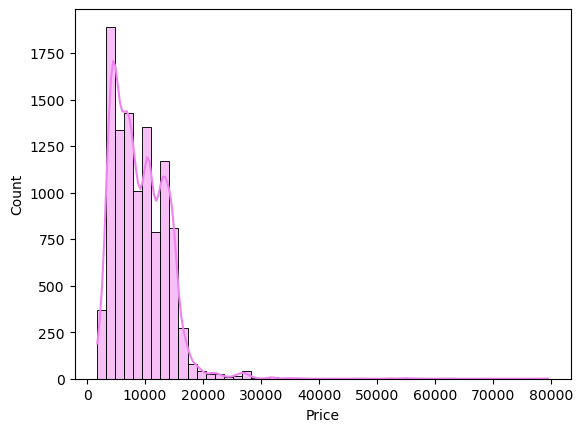

In [15]:
sns.histplot(data =df,x ="Price",kde=True,bins=50,color="violet")

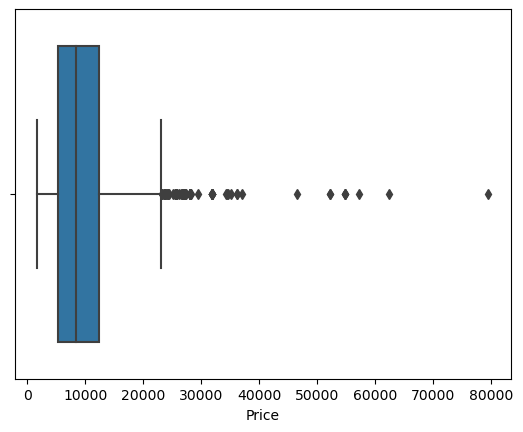

In [16]:
sns.boxplot(data =df,x ="Price")
plt.show()

<AxesSubplot: xlabel='Price', ylabel='Density'>

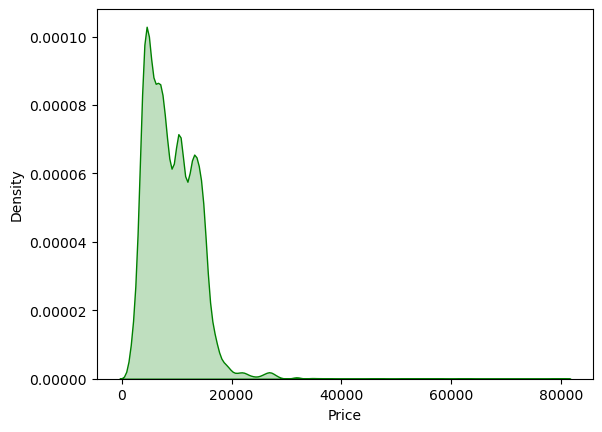

In [17]:
sns.kdeplot(data =df,x ="Price",fill=True,color="Green")

From the above visual distributions we can clearly see that, the distribution is following right skewed distribution,where most of the flight prices are falling 
b/w 0 to 2000 values

# Q3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [18]:
df['Price'].unique

<bound method Series.unique of 785     26743
3535    26092
5549     4622
4765    22270
3835     5515
        ...  
8294     5684
8319    10441
8332     4804
8403    13377
7332     8372
Name: Price, Length: 10683, dtype: int64>

In [19]:
#mini_price,maxi_price=min(df['Price']),max(df['Price'])
mini_price =min(df['Price'])
maxi_price =max(df['Price'])
#min=5
#import math
#mi =min(df['Price'])

In [47]:
mini_price,maxi_price

(1759, 79512)

# Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.

In [21]:
df['Airline'].unique()

array(['Air India', 'SpiceJet', 'Jet Airways', 'IndiGo', 'Vistara',
       'Jet Airways Business', 'Multiple carriers', 'GoAir', 'Air Asia',
       'Vistara Premium economy', 'Trujet',
       'Multiple carriers Premium economy'], dtype=object)

Text(0.5, 1.0, 'Flight Price Representation of various flights')

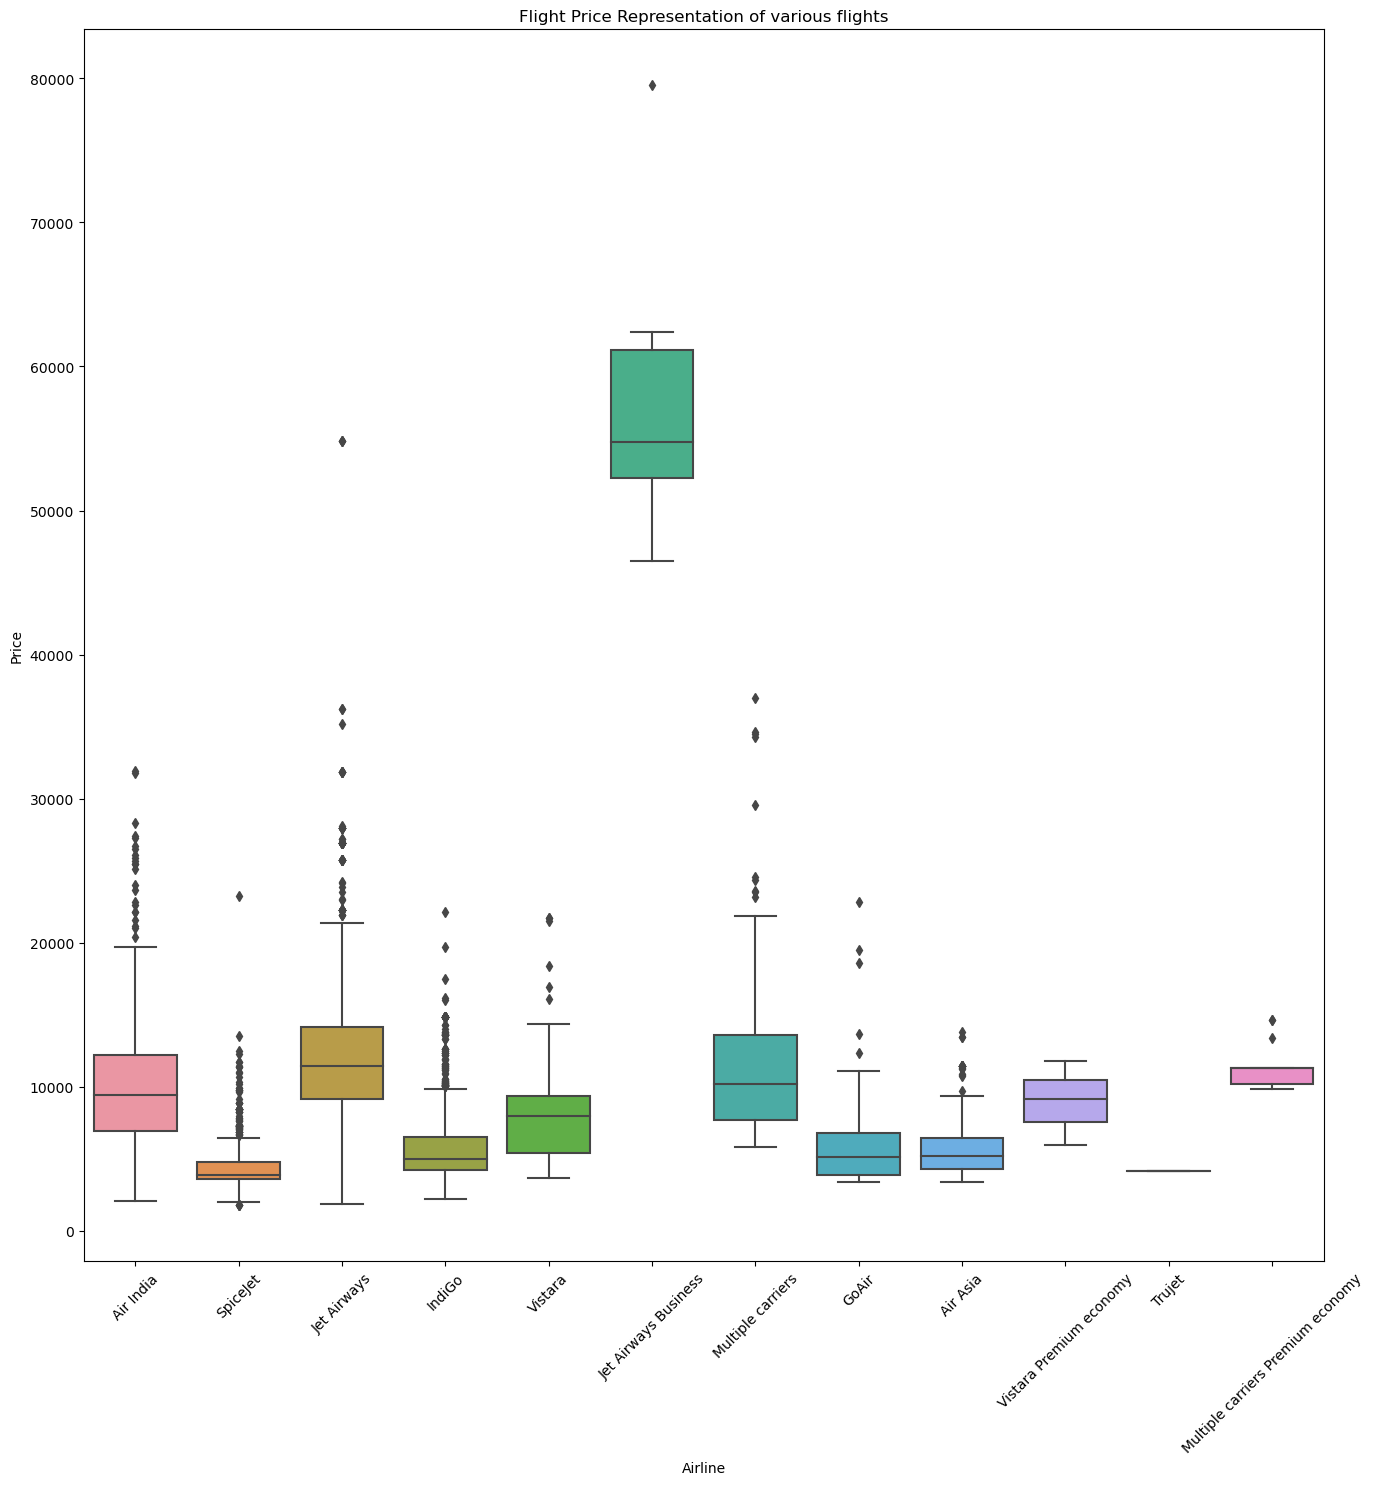

In [22]:

plt.figure(figsize=(16,16))
sns.boxplot(data=df,y=df['Price'],x=df['Airline'])
plt.xticks(rotation =45)
plt.title("Flight Price Representation of various flights")

# Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.


<AxesSubplot: xlabel='Price'>

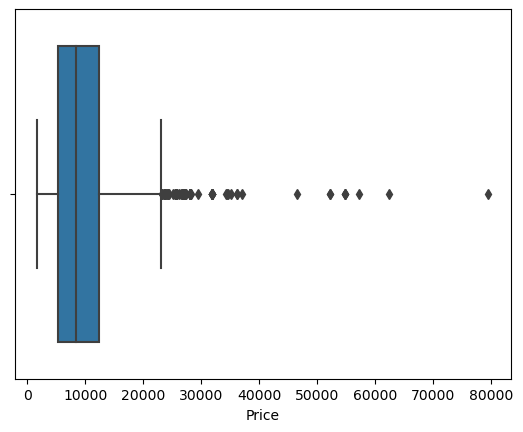

In [23]:
sns.boxplot(data=df,x=df['Price'])

Yes, there are clearly outliers existing inside the Flight Price data which are ranging between the price range of 24,000 to 62,000
where there is one datapoint which is closer to the 80,000 and away from the other outliers which clearly indicates that the point is Significant outlier which 
is may or may not existing in the  data



Potential outliers can have a significant impact on data analysis and modeling:

**Influence on Summary Statistics** :

Outliers can distort summary statistics such as mean, median, and standard deviation.
The mean is sensitive to extreme values, and its value can be pulled in the direction of outliers.

**Distortion of Distribution**:

Outliers can affect the shape of the distribution, making it skewed or creating a long tail.
This can lead to incorrect assumptions about the normality of the data.

**Regression Models**:

In linear regression, outliers can disproportionately influence the regression line, affecting the model's accuracy.
Outliers can result in a biased model that doesn't accurately represent the majority of the data.

**Anomaly Detection**:

Outliers can be indicative of anomalies, data entry errors, or unusual events that require investigation.

**Model Performance**:
In machine learning, models can perform poorly if they are sensitive to outliers.
Outliers can lead to overfitting, where the model fits the noise in the data rather than the underlying pattern.

**Data Integrity**:

Outliers might signal data quality issues or measurement errors.
It's important to validate the source of outliers to ensure data integrity.
In analysis, the approach to handling potential outliers depends on the context. 
Sometimes, outliers might be genuine observations, while in other cases, they might indicate errors or anomalies.
It's crucial to carefully evaluate and understand the nature of potential outliers before deciding whether to exclude, transform, or treat them in the analysis.

# Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?


**I would like to analyze the Date of Journey column to identify the peak season,Because where essential data is presented to extract the dates,month,year and perform analysis to know the peak season ,When comes to Presenting the trends I'll present my findings with the help of Barplot,Countplot,Histplot which actually shows the significant months/dates that  actuallly lying in peak seasons**


In [24]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'DOJ', 'month', 'day', 'year',
       'duration of hours', 'duration of min'],
      dtype='object')

In [25]:
#df['Date_of_Journey']
#plt.plot()
#plt.plot(df['Date_of_Journey'], df['Airline'], marker='o', linestyle='-')
#df.head()
grouped_data = df.groupby('Date_of_Journey').count()['Airline']
print(grouped_data)

Date_of_Journey
2019-03-01    199
2019-03-03    315
2019-03-06    403
2019-03-09    302
2019-03-12    142
2019-03-15    162
2019-03-18    156
2019-03-21    423
2019-03-24    323
2019-03-27    299
2019-04-01    257
2019-04-03    110
2019-04-06    100
2019-04-09    125
2019-04-12     63
2019-04-15     89
2019-04-18     67
2019-04-21     82
2019-04-24     92
2019-04-27     94
2019-05-01    277
2019-05-03     90
2019-05-06    282
2019-05-09    484
2019-05-12    259
2019-05-15    405
2019-05-18    504
2019-05-21    497
2019-05-24    286
2019-05-27    382
2019-06-01    342
2019-06-03    333
2019-06-06    503
2019-06-09    495
2019-06-12    493
2019-06-15    328
2019-06-18    105
2019-06-21    109
2019-06-24    351
2019-06-27    355
Name: Airline, dtype: int64


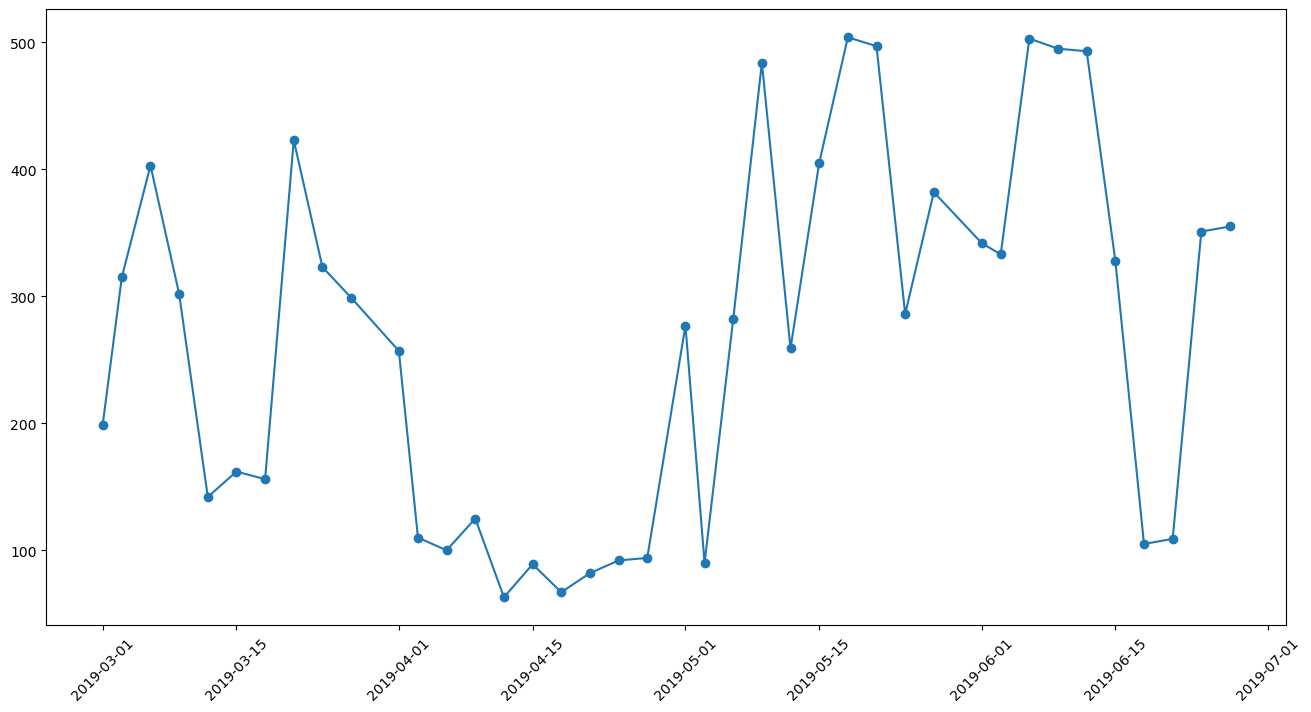

In [26]:
#plt.plot(df['Date_of_Journey'], grouped_data, marker='o', linestyle='-')
plt.figure(figsize=(16,8))
plt.plot(grouped_data, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.show()

## Price Generated in each month

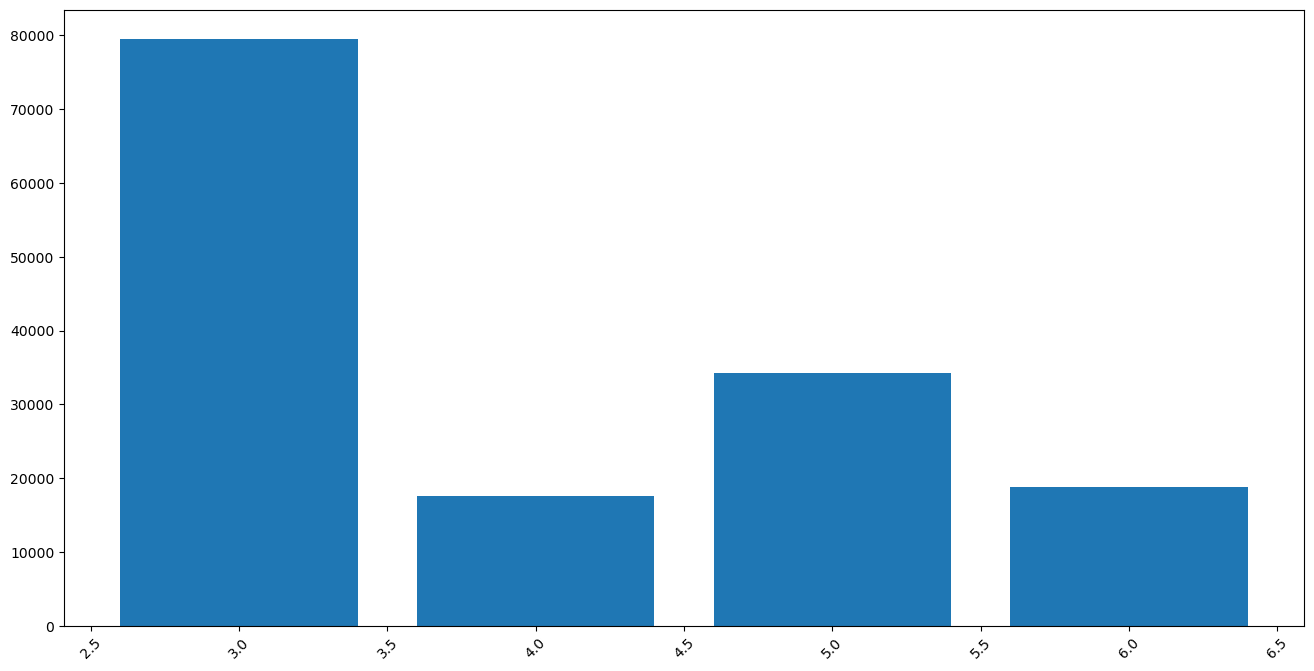

In [27]:
#plt.plot(df['Date_of_Journey'], grouped_data, marker='o', linestyle='-')
plt.figure(figsize=(16,8))
#plt.plot(df['month'],df['Price'], marker='o', linestyle='-')
plt.bar(df['month'],df['Price'])
#sns.histplot(data)
plt.xticks(rotation=45)
plt.show()

## No of Flights had been departured in each month

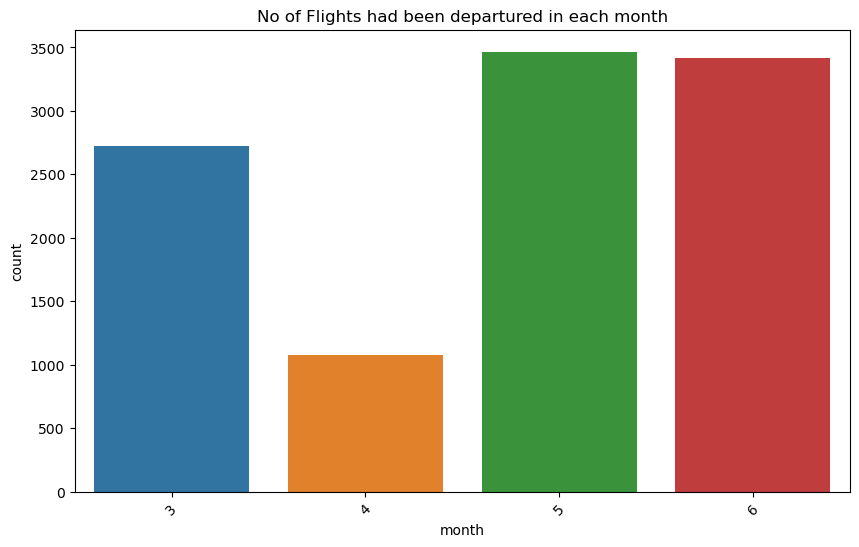

In [28]:

plt.figure(figsize=(10,6))
sns.countplot(x=df['month'])
#sns.histplot(data)
plt.title("No of Flights had been departured in each month")
plt.xticks(rotation=45)
plt.show()

In [29]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ,month,day,year,duration of hours,duration of min
785,Air India,2019-03-01,Banglore,New Delhi,BLR → BOM → BHO → DEL,08:50,23:25,14h 35m,2 stops,1 Short layover,26743,2019-03-01,3,1,2019,14,35
3535,Air India,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,11:50,23:55,12h 5m,1 stop,Change airports,26092,2019-03-01,3,1,2019,12,5
5549,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,06:55,09:35,2h 40m,non-stop,No info,4622,2019-03-01,3,1,2019,2,40
4765,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,16:10,8h 10m,1 stop,No info,22270,2019-03-01,3,1,2019,8,10
3835,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,2019-03-01,3,1,2019,2,30


# Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


In [30]:
df['Date_of_Journey'].value_counts()

2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-06-09    495
2019-06-12    493
2019-05-09    484
2019-03-21    423
2019-05-15    405
2019-03-06    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-06-01    342
2019-06-03    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-03-09    302
2019-03-27    299
2019-05-24    286
2019-05-06    282
2019-05-01    277
2019-05-12    259
2019-04-01    257
2019-03-01    199
2019-03-15    162
2019-03-18    156
2019-03-12    142
2019-04-09    125
2019-04-03    110
2019-06-21    109
2019-06-18    105
2019-04-06    100
2019-04-27     94
2019-04-24     92
2019-05-03     90
2019-04-15     89
2019-04-21     82
2019-04-18     67
2019-04-12     63
Name: Date_of_Journey, dtype: int64

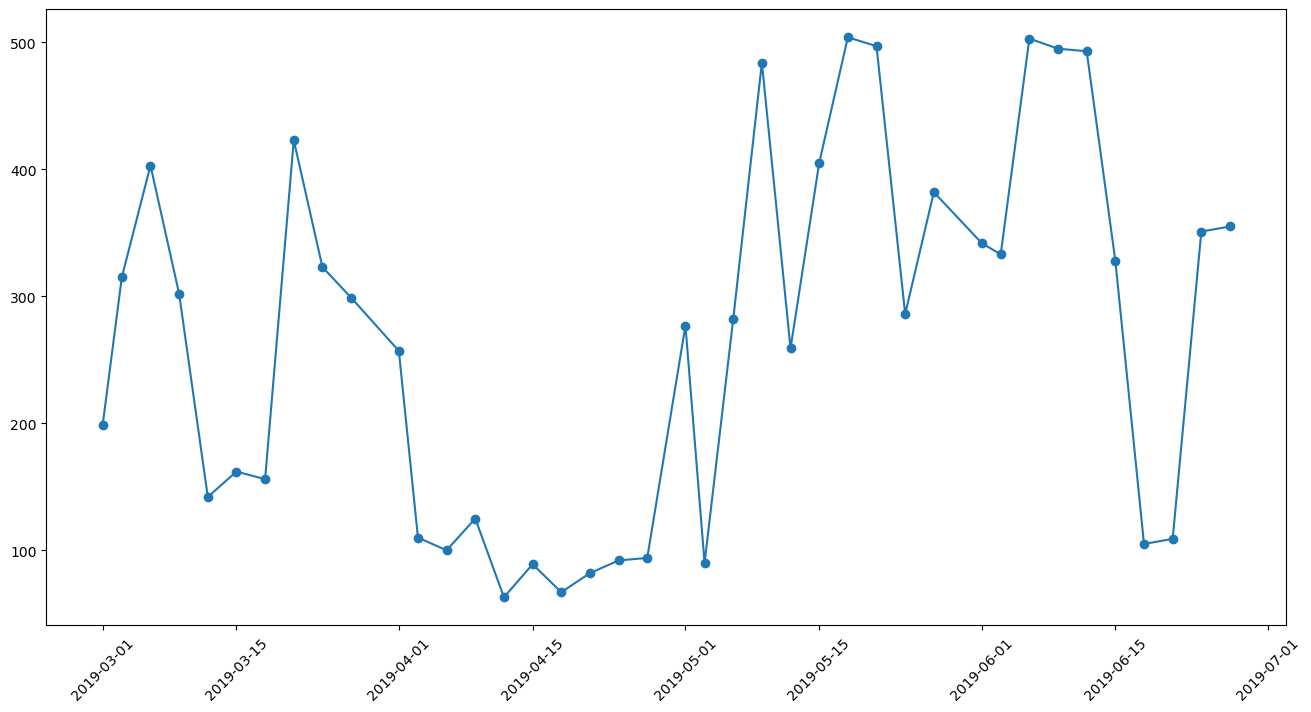

In [31]:

plt.figure(figsize=(16,8))
plt.plot(grouped_data, marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Weekly Distribution of Journey dates')

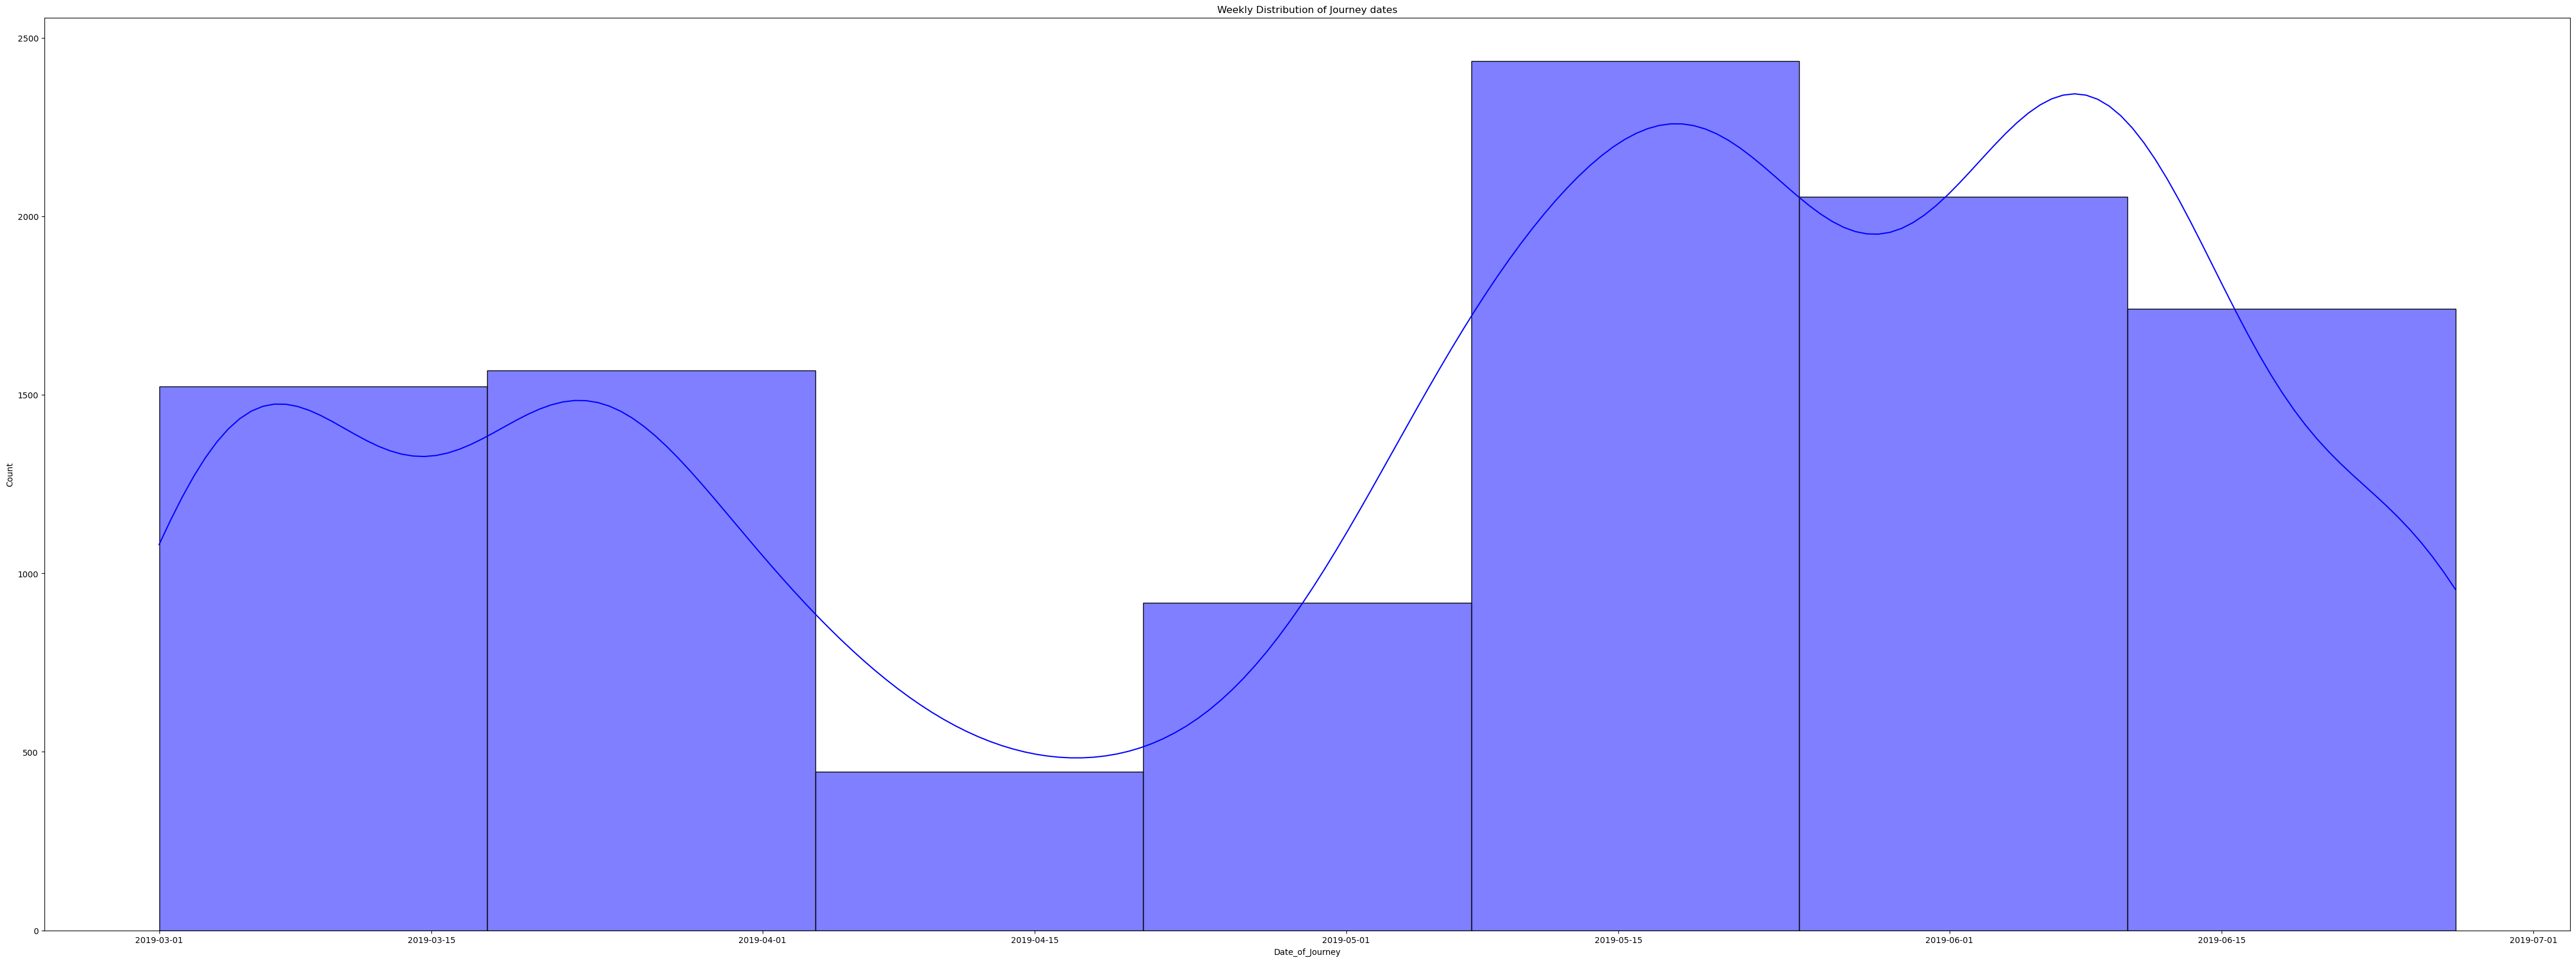

In [32]:
#sns.countplot(data =df,x ="Date_of_Journey")
plt.figure(figsize=(55,20))
sns.histplot(data =df,x ="Date_of_Journey",bins=7,kde=True,color="blue")
plt.title("Weekly Distribution of Journey dates")

<AxesSubplot: xlabel='Date_of_Journey', ylabel='count'>

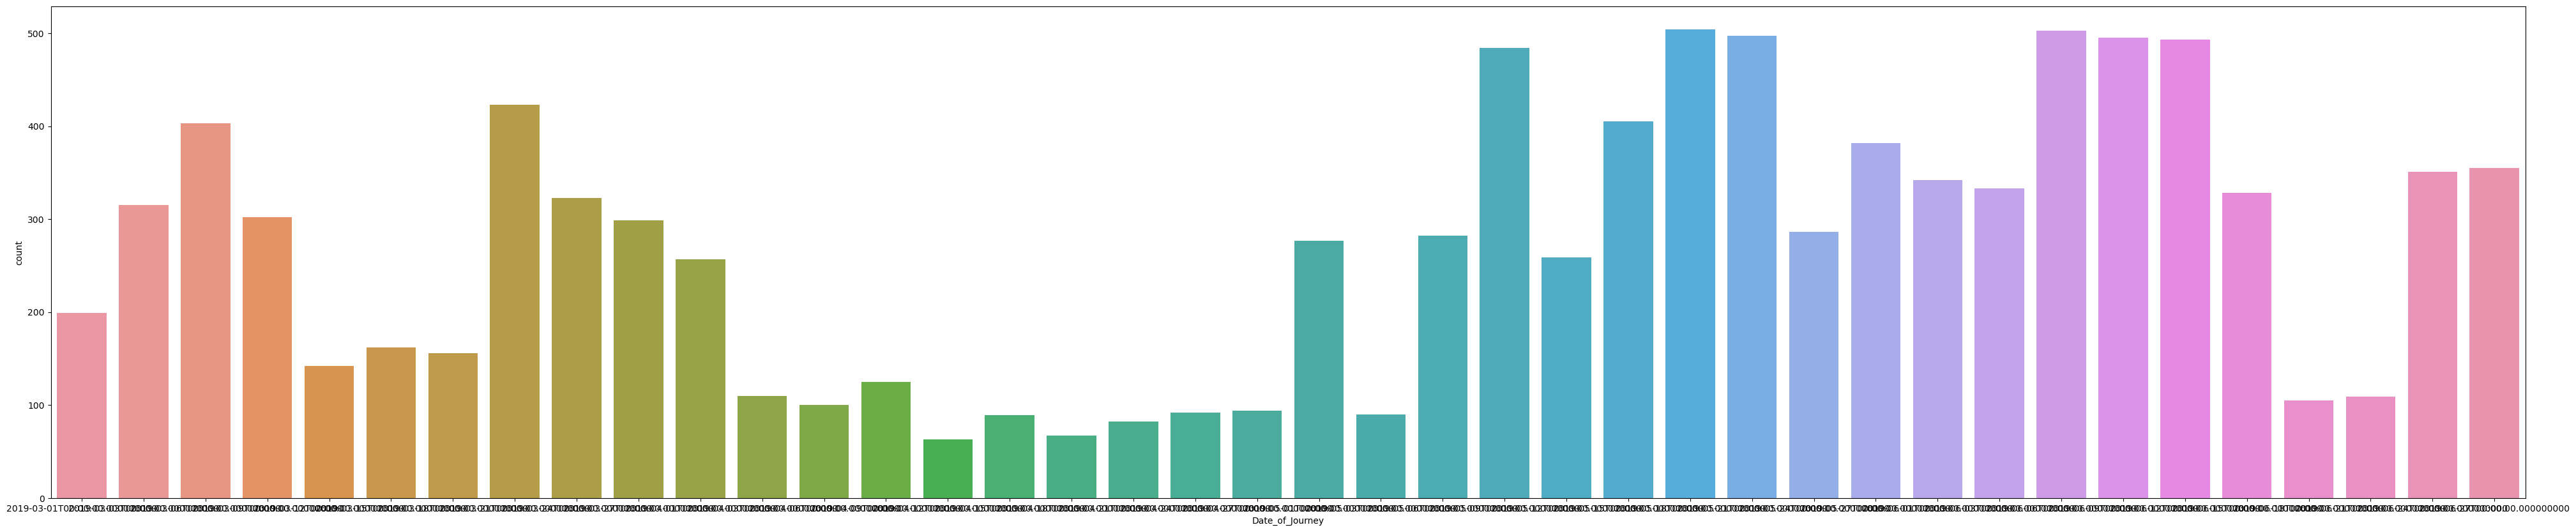

In [33]:
plt.figure(figsize=(50,10))
sns.countplot(data =df,x ="Date_of_Journey")

In [34]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ,month,day,year,duration of hours,duration of min
785,Air India,2019-03-01,Banglore,New Delhi,BLR → BOM → BHO → DEL,08:50,23:25,14h 35m,2 stops,1 Short layover,26743,2019-03-01,3,1,2019,14,35
3535,Air India,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,11:50,23:55,12h 5m,1 stop,Change airports,26092,2019-03-01,3,1,2019,12,5
5549,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,06:55,09:35,2h 40m,non-stop,No info,4622,2019-03-01,3,1,2019,2,40
4765,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,16:10,8h 10m,1 stop,No info,22270,2019-03-01,3,1,2019,8,10
3835,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,2019-03-01,3,1,2019,2,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8294,IndiGo,2019-06-27,Delhi,Cochin,DEL → BOM → COK,10:35,01:30 28 Jun,14h 55m,1 stop,No info,5684,2019-06-27,6,27,2019,14,55
8319,Air India,2019-06-27,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 28 Jun,21h 15m,2 stops,No info,10441,2019-06-27,6,27,2019,21,15
8332,IndiGo,2019-06-27,Kolkata,Banglore,CCU → BLR,11:30,14:05,2h 35m,non-stop,No info,4804,2019-06-27,6,27,2019,2,35
8403,Multiple carriers,2019-06-27,Delhi,Cochin,DEL → BOM → COK,11:30,01:30 28 Jun,14h,1 stop,No info,13377,2019-06-27,6,27,2019,14,0


In [35]:
df.month.value_counts()

5    3466
6    3414
3    2724
4    1079
Name: month, dtype: int64

<AxesSubplot: xlabel='Airline', ylabel='Count'>

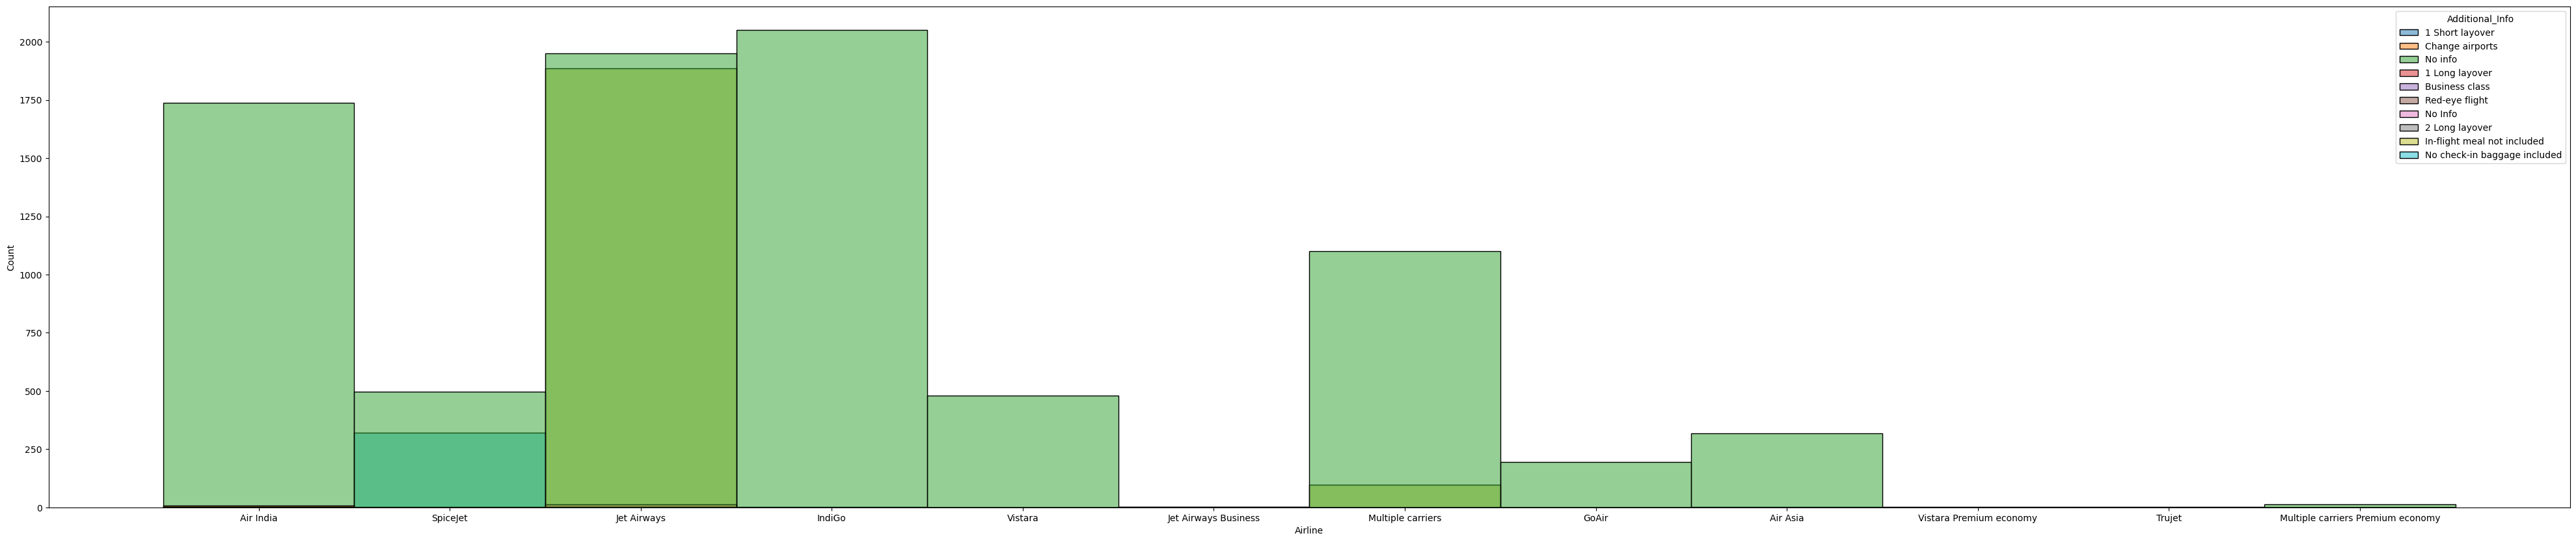

In [36]:
plt.figure(figsize=(50,10))
sns.histplot(x=df["Airline"],hue=df["Additional_Info"])

<AxesSubplot: title={'center': 'Distribution of Flight Travel'}, xlabel='Airline', ylabel='count'>

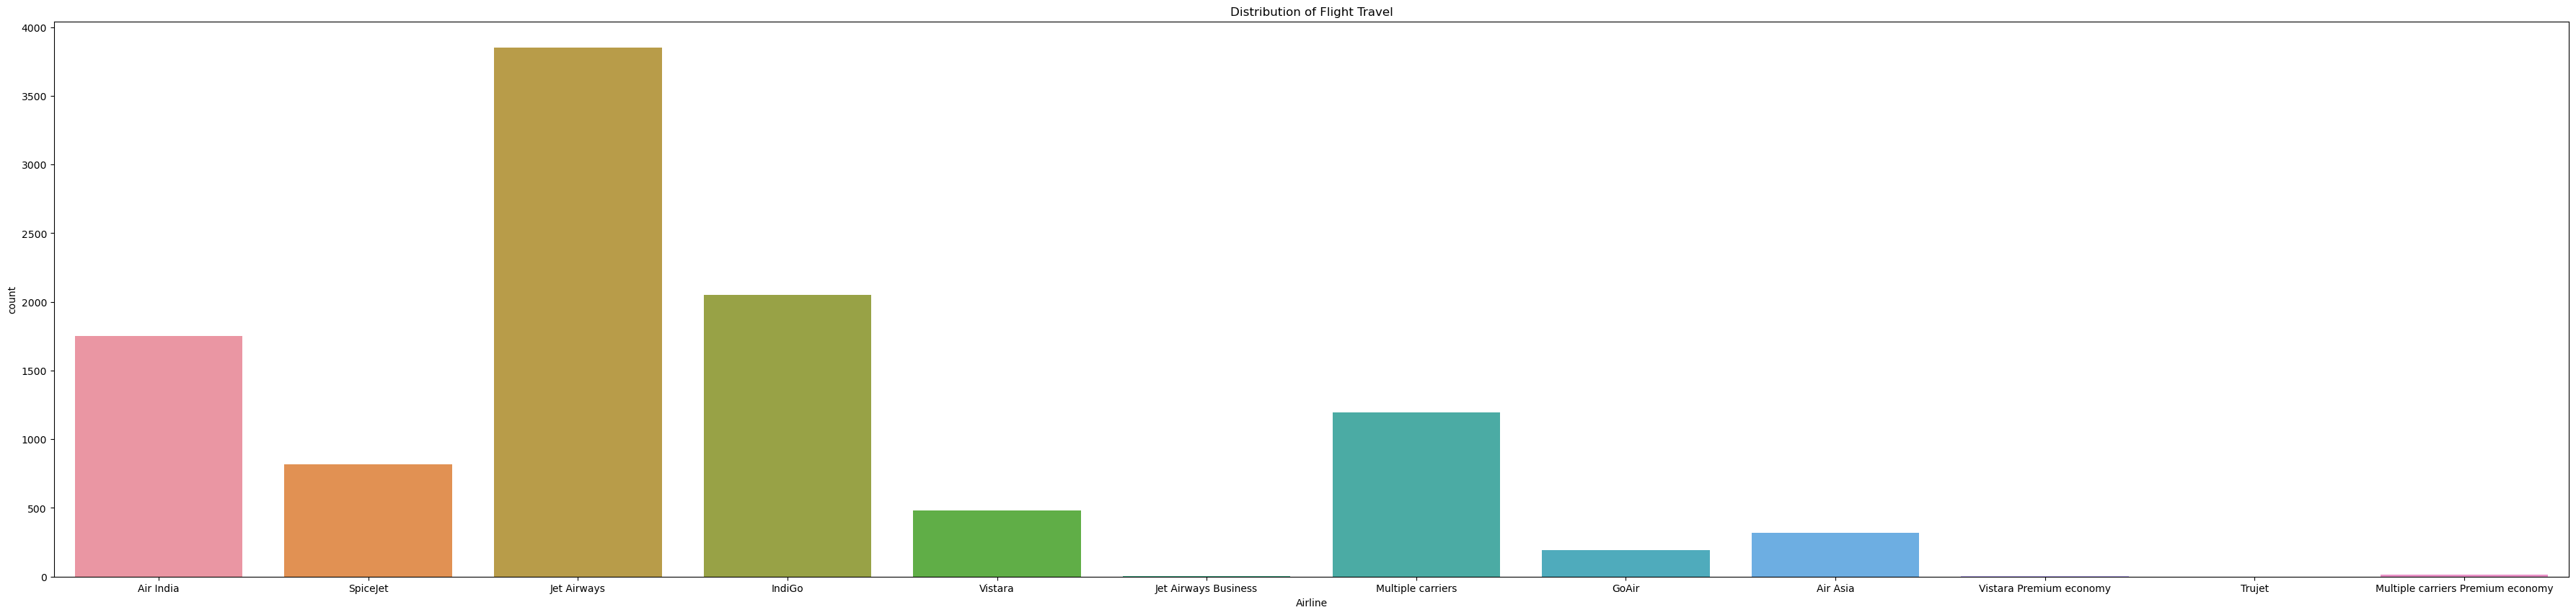

In [37]:
plt.figure(figsize=(45,10))
plt.title("Distribution of Flight Travel")
sns.countplot(x=df["Airline"])

<AxesSubplot: title={'center': 'Count of Passengers from each month'}, xlabel='month', ylabel='count'>

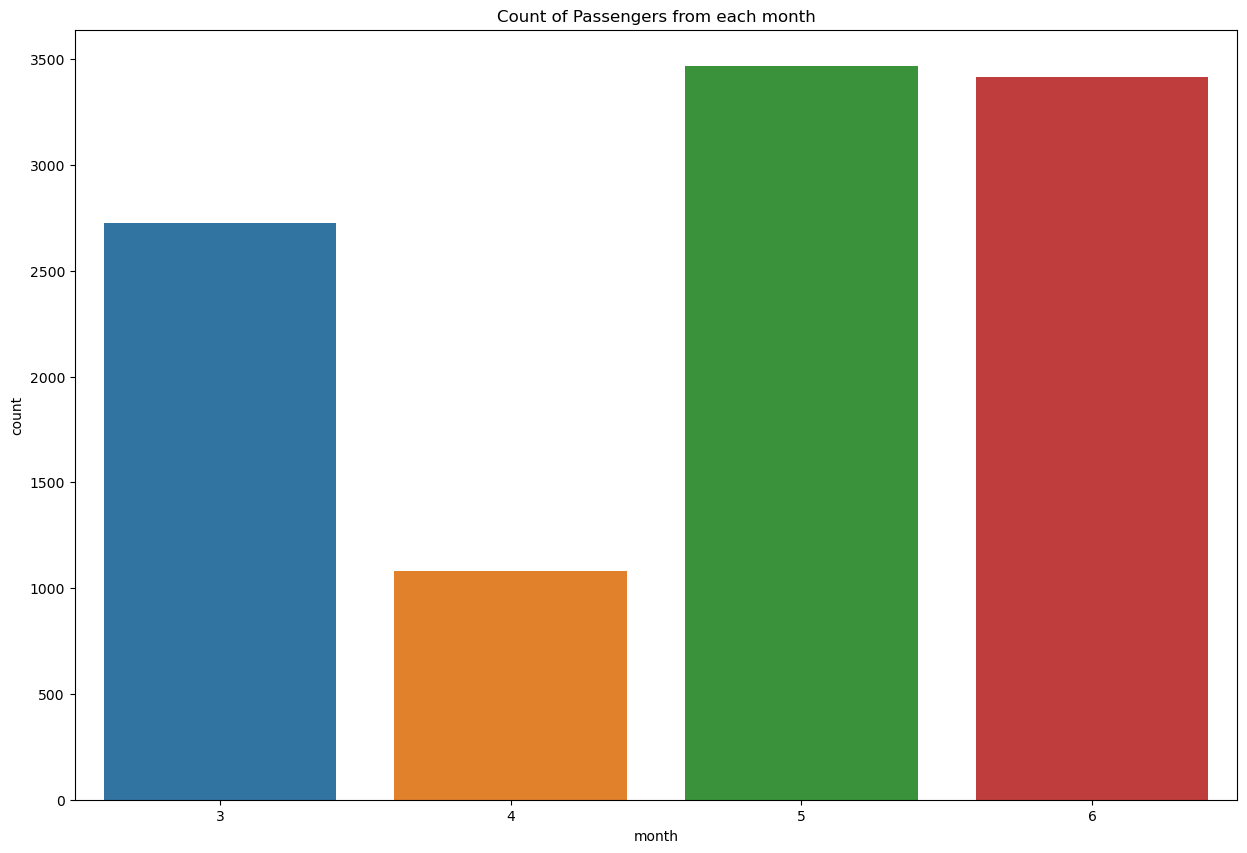

In [38]:
plt.figure(figsize=(15,10))
plt.title("Count of Passengers from each month")
sns.countplot(x=df["month"])


In [39]:
#df['Additional_Info'].value_counts()

# Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [40]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'DOJ', 'month', 'day', 'year',
       'duration of hours', 'duration of min'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 785 to 7332
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Airline            10683 non-null  object        
 1   Date_of_Journey    10683 non-null  datetime64[ns]
 2   Source             10683 non-null  object        
 3   Destination        10683 non-null  object        
 4   Route              10682 non-null  object        
 5   Dep_Time           10683 non-null  object        
 6   Arrival_Time       10683 non-null  object        
 7   Duration           10683 non-null  object        
 8   Total_Stops        10682 non-null  object        
 9   Additional_Info    10683 non-null  object        
 10  Price              10683 non-null  int64         
 11  DOJ                10683 non-null  datetime64[ns]
 12  month              10683 non-null  int64         
 13  day                10683 non-null  int64         
 14  year 

In [42]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,DOJ,month,day,year,duration of hours,duration of min
785,Air India,2019-03-01,Banglore,New Delhi,BLR → BOM → BHO → DEL,08:50,23:25,14h 35m,2 stops,1 Short layover,26743,2019-03-01,3,1,2019,14,35
3535,Air India,2019-03-01,Banglore,New Delhi,BLR → MAA → DEL,11:50,23:55,12h 5m,1 stop,Change airports,26092,2019-03-01,3,1,2019,12,5
5549,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,06:55,09:35,2h 40m,non-stop,No info,4622,2019-03-01,3,1,2019,2,40
4765,Jet Airways,2019-03-01,Banglore,New Delhi,BLR → BOM → DEL,08:00,16:10,8h 10m,1 stop,No info,22270,2019-03-01,3,1,2019,8,10
3835,SpiceJet,2019-03-01,Kolkata,Banglore,CCU → BLR,09:00,11:30,2h 30m,non-stop,No info,5515,2019-03-01,3,1,2019,2,30


In [43]:
doj =df['Date_of_Journey'].value_counts()

/tmp/ipykernel_140/2975651719.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


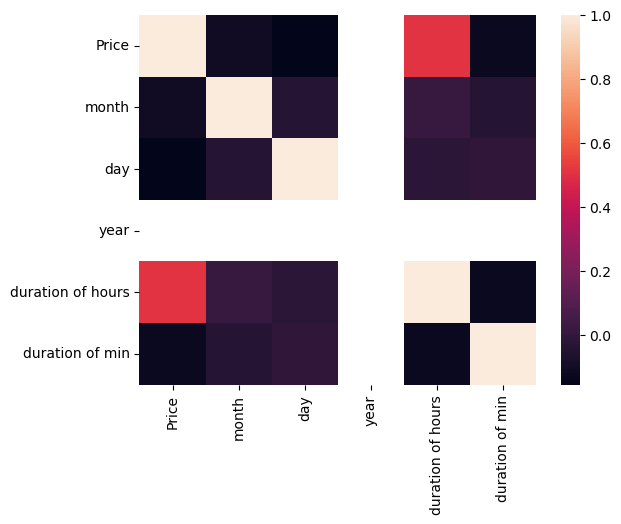

In [48]:
sns.heatmap(df.corr())
plt.show()

From the above heatmap we can clearly see that,the correlation between duration of hours with Price is too high,comparitively with other columns 

Therefore, the major primary factor for determining flight prices are depended on duration of hours

In [45]:
#sns.pairplot(df)

In [ ]:
df1.info()